In [ ]:
import pydarn
import pydarnio

import matplotlib.pyplot as plt
from datetime import datetime
from pydarn import Coords,Projs

#Read in fitACF file using SuperDARDRead, then read_fitacf
bpk_fitacf_file = '/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.0001.00.bpk.fitacf'

bpk_fitacf_reader = pydarnio.SDarnRead(bpk_fitacf_file)
bpk_fitacf_data = bpk_fitacf_reader.read_fitacf()

# fig = plt.figure(figsize=(15,12))
# kwargs1 = {
# 'boundary': True,
# 'zmax': 200,
# 'zmin': -200,
# 'groundscatter': False,
# 'scan_index':22,
# 'colorbar_label':'Velocity m/s',
# 'line_color':'blue',
# 'radar_label': True,
# 'parameter': 'v',
# # 'full_array':False
# }

# ax, beam_corners_lats, beam_corners_lons, scan, grndsct = \
#     pydarn.Fan.plot_fan(bks_fitacf_data, colorbar=True, **kwargs1) 
# plt.show()

fig2 = plt.figure(figsize=(15,12))
kwargs2 = {
'boundary': True,
'zmax': 200,
'zmin': -200,
'groundscatter': False,
'scan_index':22,
'colorbar_label':'Power[dB]',
'line_color':'black',
'radar_label': True,
'parameter': 'p_l',
'full_array':False,
'coords':Coords.SLANT_RANGE, 
'projs':Projs.GEO
}

ax, beam_corners_lats, beam_corners_lons, scan, grndsct = \
    pydarn.Fan.plot_fan(bpk_fitacf_data, colorbar=True, **kwargs2) 
ax.coastlines()
plt.show()

# fig3 = plt.figure(figsize=(15,12))
# kwargs3 = {
# 'boundary': True,
# 'zmax': 200,
# 'zmin': -200,
# 'groundscatter': False,
# 'scan_index':22,
# 'colorbar_label':'Power[dB]',
# 'line_color':'black',
# 'radar_label': True,
# 'parameter': 'p_l',
# 'full_array':False,
# 'coords':Coords.GSMR, 
# 'projs':Projs.GEO
# }

# ax, beam_corners_lats, beam_corners_lons, scan, grndsct = \
#     pydarn.Fan.plot_fan(bks_fitacf_data, colorbar=True, **kwargs3) 
# ax.coastlines()
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
# create the lat/lon points
lons = np.array([136.8,166.2])
lats = np.array([-57.1,-34.3])

# create the projections
ortho = ccrs.Orthographic(central_longitude=0, central_latitude=-30)
geo = ccrs.Geodetic()

# create the geoaxes for an orthographic projection
ax = plt.axes(projection=ortho)

# transform lat/lons points to othographic points
points = ortho.transform_points(geo, lons, lats)
# import ipdb;ipdb.set_trace()
# plot native orthographic points                                                                                
ax.plot(points[:, 0], points[:, 1], 'ro')

# plot north pole for reference (with a projection transform)                                                                                           
ax.plot([0], [90], 'b^', transform=geo)

# add coastlines for reference                                                                                                
ax.coastlines(resolution='50m')
ax.set_global()

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import datetime
time   = datetime.datetime(2010,11,19,1,5)
deg_from_midnight = (time.hour + time.minute / 60) / 24 * 360
noon = 360 - deg_from_midnight
pole_lat = -90
proj=ccrs.Orthographic(noon,pole_lat)
geo = ccrs.Geodetic()
tu = proj.transform_point(noon, 30,geo)
print(tu)

In [1]:
#Import the modules we need.
%matplotlib inline
import datetime

from matplotlib import pyplot as plt 
import numpy as np
from pyDARNmusic.musicPlot import musicRTP,musicFan,timeSeriesMultiPlot,plotRelativeRanges,spectrumMultiPlot,plotFullSpectrum,plotDlm, plotKarr,plotKarrDetected
from pyDARNmusic import load_fitacf
from pyDARNmusic import music
# from music import defineLimits, filterTimes,beamInterpolation,timeInterpolation,determineRelativePosition


import pydarn
import pydarnio


IMPORTANT: Please make sure to cite pyDARN in publications that use plots created by pyDARN using DOI: https://zenodo.org/record/3727269. Citing information for SuperDARN data is found at https://pydarn.readthedocs.io/en/master/user/citing/


In [2]:
radar   = 'bpk'
sDate   = datetime.datetime(2017,1,15,1)
eDate   = datetime.datetime(2017,1,15,23)
fit_sfx = "fitacf"
data_dir = f'/home/fran/code/SuperdarnW3usr/ForGitRepo/'
fitacf  = load_fitacf(radar,sDate,eDate,data_dir=data_dir)

Loading fitacf Files:   0%|                              | 0/12 [00:00<?, ?it/s]

/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.0001.00.bpk.fitacf.bz2


Loading fitacf Files:   8%|█▊                    | 1/12 [00:02<00:29,  2.71s/it]

/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.0201.00.bpk.fitacf.bz2


Loading fitacf Files:  17%|███▋                  | 2/12 [00:05<00:28,  2.81s/it]

/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.0401.00.bpk.fitacf.bz2


Loading fitacf Files:  25%|█████▌                | 3/12 [00:08<00:26,  2.89s/it]

/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.0601.00.bpk.fitacf.bz2


Loading fitacf Files:  33%|███████▎              | 4/12 [00:11<00:24,  3.04s/it]

/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.0801.00.bpk.fitacf.bz2


Loading fitacf Files:  42%|█████████▏            | 5/12 [00:15<00:22,  3.17s/it]

/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.1001.00.bpk.fitacf.bz2


Loading fitacf Files:  50%|███████████           | 6/12 [00:18<00:19,  3.20s/it]

/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.1201.00.bpk.fitacf.bz2


Loading fitacf Files:  58%|████████████▊         | 7/12 [00:21<00:15,  3.18s/it]

/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.1401.00.bpk.fitacf.bz2


Loading fitacf Files:  67%|██████████████▋       | 8/12 [00:24<00:12,  3.22s/it]

/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.1601.00.bpk.fitacf.bz2


Loading fitacf Files:  75%|████████████████▌     | 9/12 [00:28<00:09,  3.19s/it]

/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.1801.00.bpk.fitacf.bz2


Loading fitacf Files:  83%|█████████████████▌   | 10/12 [00:31<00:06,  3.21s/it]

/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.2001.00.bpk.fitacf.bz2


Loading fitacf Files:  92%|███████████████████▎ | 11/12 [00:34<00:03,  3.30s/it]

/home/fran/code/SuperdarnW3usr/ForGitRepo/2017/fitacf/bpk/20170115.2201.00.bpk.fitacf.bz2


Loading fitacf Files: 100%|█████████████████████| 12/12 [00:38<00:00,  3.21s/it]


/home/fran/code/pydarn/pydarn/utils/range_estimations.py: 41: RuntimeWarning: invalid value encountered in sqrt
/home/fran/code/newMusic/MUSIC/pyDARNmusic/geoPack.py: 577: RuntimeWarning: invalid value encountered in remainder


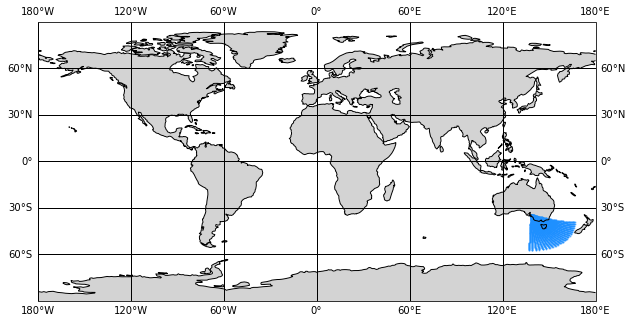

In [3]:
dataObj = music.musicArray(fitacf,sTime=sDate,eTime=eDate,fovModel='GS')

/home/fran/code/newMusic/MUSIC/pyDARNmusic/musicPlot.py: 829: UserWarning: FixedFormatter should only be used together with FixedLocator


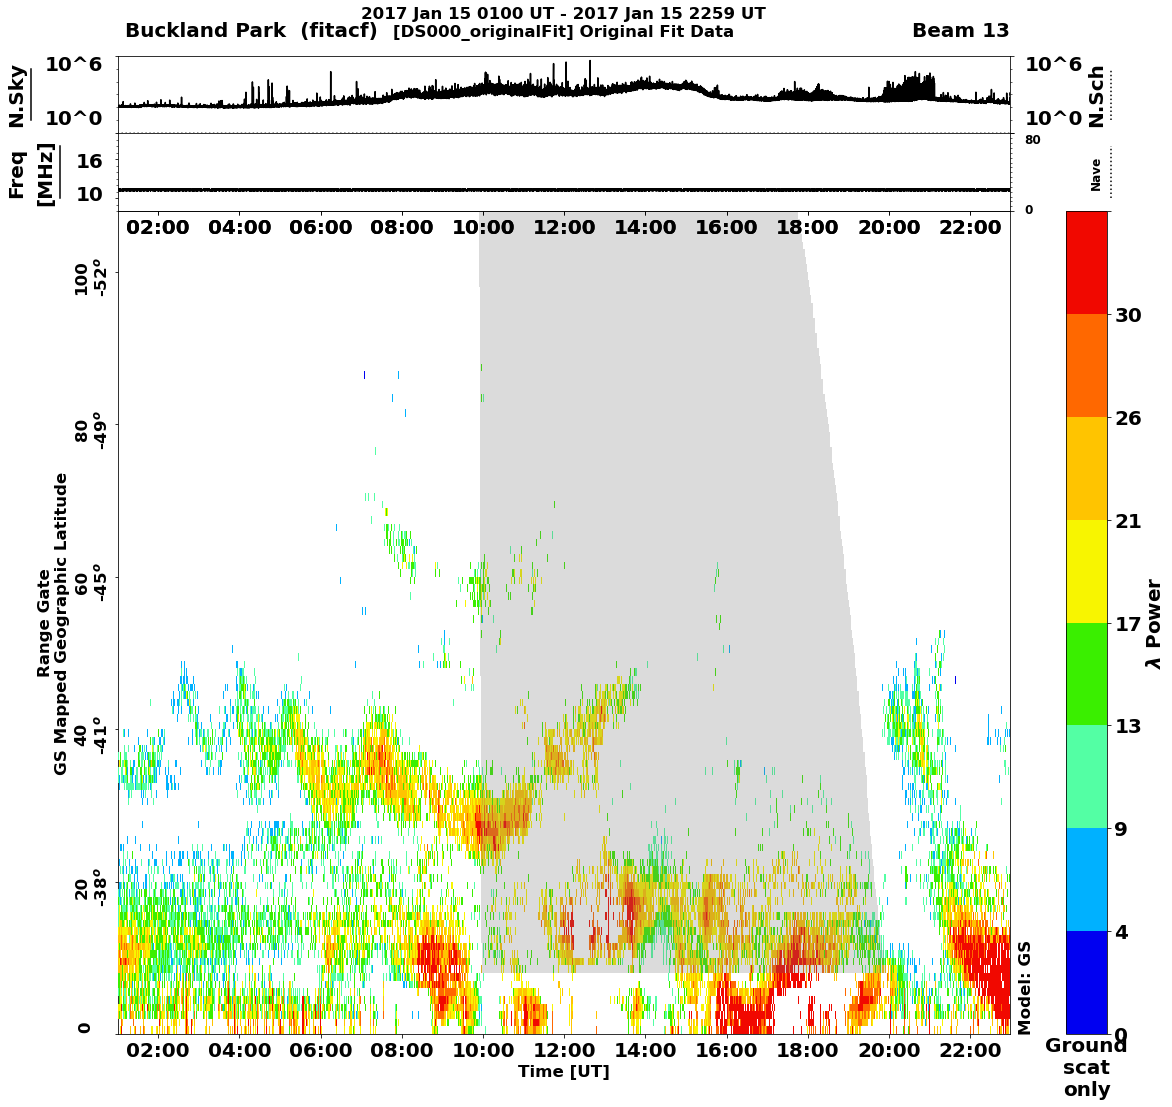

In [4]:
fig = musicRTP(dataObj,beam=13)

/home/fran/code/newMusic/MUSIC/pyDARNmusic/musicPlot.py: 415: RuntimeWarning: invalid value encountered in remainder


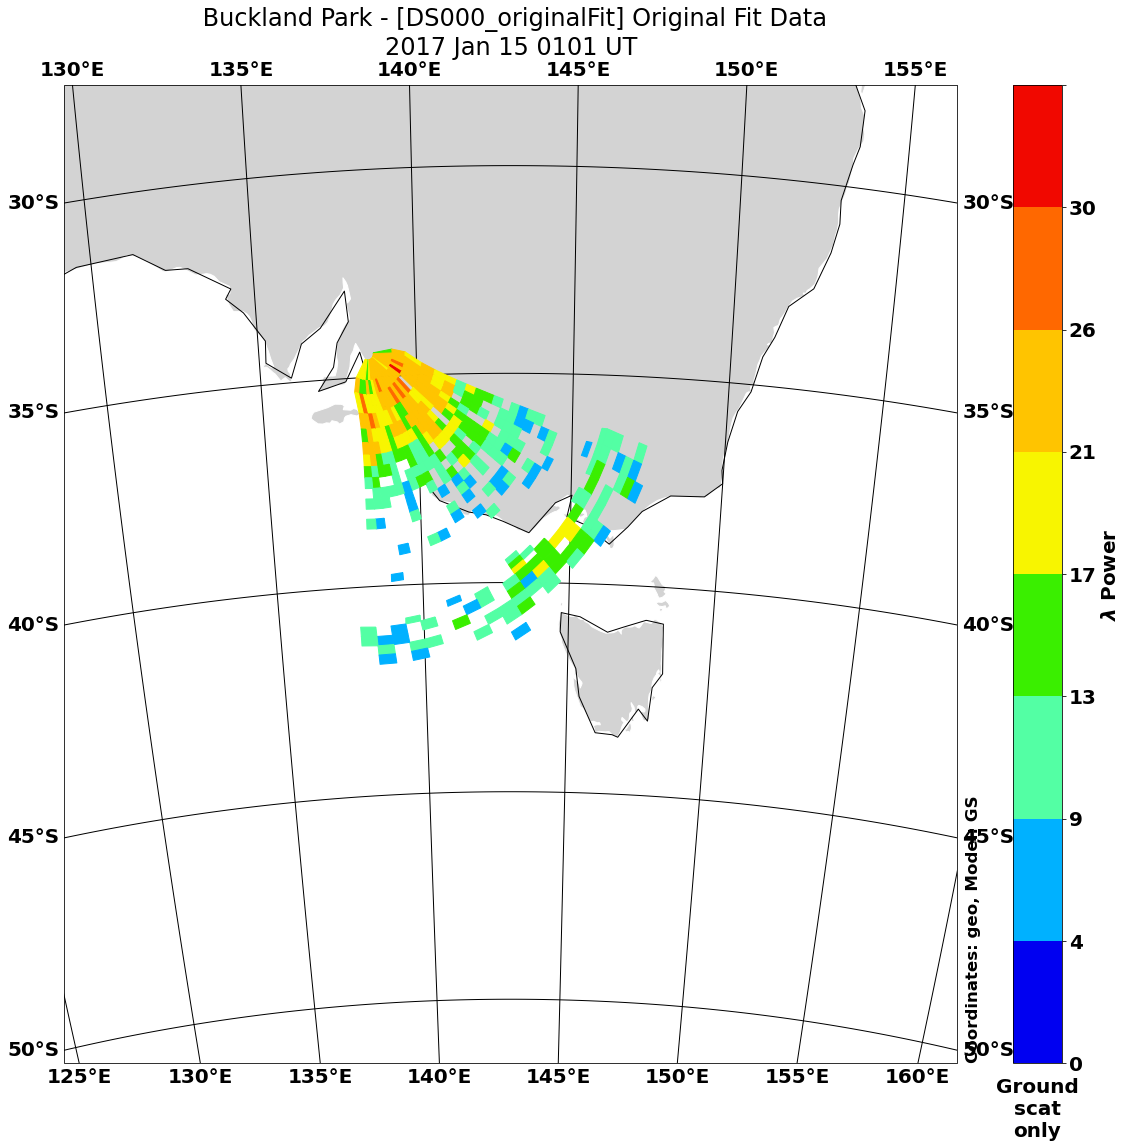

In [5]:
fig = musicFan(dataObj)

In [ ]:
plotTime = datetime.datetime(2017,1,15,6,0)
fig = musicFan(dataObj,time=plotTime,autoScale=True)